In [39]:
import numpy as np
import pandas as pd
import itertools 
import matplotlib.pyplot as plt
import math

In [40]:
df_bancolombia = pd.read_csv("bancolombia.csv")
df_bancolombia

,Date,Price,Open,High,Low,Vol.,Change %
0,03/01/2024,"33,000.0","32,860.0","33,400.0","32,860.0",176.65K,0.18%
1,02/29/2024,"32,940.0","33,420.0","34,000.0","32,940.0",781.41K,-1.61%
2,02/28/2024,"33,480.0","33,480.0","34,540.0","33,480.0",100.06K,0.00%
3,02/27/2024,"33,480.0","33,440.0","33,740.0","33,380.0",140.23K,-0.06%
4,02/26/2024,"33,500.0","34,000.0","34,320.0","33,500.0",200.64K,-1.35%
...,...,...,...,...,...,...,...
949,04/07/2020,"26,000.0","26,000.0","27,020.0","25,760.0",421.29K,2.36%
950,04/06/2020,"25,400.0","24,400.0","25,900.0","24,020.0",305.28K,6.72%
951,04/03/2020,"23,800.0","23,940.0","23,940.0","23,460.0",446.59K,-4.42%
952,04/02/2020,"24,900.0","23,500.0","24,900.0","23,080.0",192.25K,3.75%


# Preprocesamiento

In [41]:
#Eliminar columnas inútiles
df_bancolombia = df_bancolombia.drop(columns=['Open','High','Low','Vol.','Change %'])

#Se invierte el dataframe para empezar desde los datos mas antiguos
df_bancolombia = df_bancolombia.iloc[::-1]
df_bancolombia = df_bancolombia.reset_index(drop=True)

#Convertir los precios de string a float
df_bancolombia['Price'] = df_bancolombia['Price'].str.replace(',', '')
df_bancolombia['Price'] = df_bancolombia['Price'].astype(float)

#Añade la columna Y_n definida en la guía
new_col = [0]
for i in range(1, len(df_bancolombia)):
    new_col.append(float((df_bancolombia['Price'][i]/df_bancolombia['Price'][i-1]) - 1))
df_bancolombia.insert(2, 'Yn', new_col, True)

#Eliminamos primer dato debido a que no se puede calcular Yn
df_bancolombia = df_bancolombia.drop([0])
df_bancolombia = df_bancolombia.reset_index(drop=True)

In [42]:
# Temporalmente ajusta las opciones de visualización para el DataFrame df_bancolombia
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df_bancolombia)

           Date    Price         Yn
0    04/02/2020  24900.0  3.750e-02
1    04/03/2020  23800.0 -4.418e-02
2    04/06/2020  25400.0  6.723e-02
3    04/07/2020  26000.0  2.362e-02
4    04/08/2020  26100.0  3.846e-03
5    04/13/2020  26960.0  3.295e-02
6    04/14/2020  26720.0 -8.902e-03
7    04/15/2020  26800.0  2.994e-03
8    04/16/2020  26880.0  2.985e-03
9    04/17/2020  26500.0 -1.414e-02
10   04/20/2020  26200.0 -1.132e-02
11   04/21/2020  24800.0 -5.344e-02
12   04/22/2020  24780.0 -8.065e-04
13   04/23/2020  24500.0 -1.130e-02
14   04/24/2020  23040.0 -5.959e-02
15   04/27/2020  24500.0  6.337e-02
16   04/28/2020  25500.0  4.082e-02
17   04/29/2020  25020.0 -1.882e-02
18   04/30/2020  25320.0  1.199e-02
19   05/04/2020  24140.0 -4.660e-02
20   05/05/2020  23720.0 -1.740e-02
21   05/06/2020  23000.0 -3.035e-02
22   05/07/2020  24240.0  5.391e-02
23   05/08/2020  24000.0 -9.901e-03
24   05/11/2020  23600.0 -1.667e-02
25   05/12/2020  23500.0 -4.237e-03
26   05/13/2020  22260.0 -5.

# Definición de estados

In [43]:
#calcula estados basados en el valor de la columna 'Yn' en relación con la desviación estándar de una ventana de datos de tamaño l
new_col = []
l = 20
data = df_bancolombia['Yn']

for i, percentage in enumerate(data):
    if(i >= (l - 1)):
        min = i - l + 1
        
        desviacion = np.std(data[min:i])

        if percentage >= (2 * desviacion):
            new_col.append('S3')
        elif percentage >= desviacion:
            new_col.append('S2')
        elif percentage >= 0:
            new_col.append('S1')
        elif percentage >= -(desviacion):
            new_col.append('B1')
        elif percentage >= -(2 * desviacion):
            new_col.append('B2')
        else:
            new_col.append('B3')

# Elimina las primeras filas del DataFrame df_bancolombia que se utilizaron para calcular los primeros estados
df_bancolombia = df_bancolombia.drop([i for i in range(l-1)])
# Inserta la columna de estados calculados en la posición 2 del DataFrame df_bancolombia
df_bancolombia.insert(2, 'Estado', new_col, True)
# Reestablece los índices del DataFrame df_bancolombia después de eliminar las filas
df_bancolombia = df_bancolombia.reset_index(drop=True)

In [44]:
df_bancolombia

,Date,Price,Estado,Yn
0,05/04/2020,24140.0,B2,-0.046603
1,05/05/2020,23720.0,B1,-0.017399
2,05/06/2020,23000.0,B1,-0.030354
3,05/07/2020,24240.0,S2,0.053913
4,05/08/2020,24000.0,B1,-0.009901
...,...,...,...,...
929,02/26/2024,33500.0,B1,-0.013545
930,02/27/2024,33480.0,B1,-0.000597
931,02/28/2024,33480.0,S1,0.000000
932,02/29/2024,32940.0,B1,-0.016129


In [45]:
estados_posibles = ['B3', 'B2', 'B1', 'S1', 'S2', 'S3']  # Posibles estados del sistema

total_cols = len(estados_posibles)  # Calcula el número total de columnas, que es igual al número de estados posibles
total_rows = total_cols * total_cols  # Calcula el número total de filas como el cuadrado del número de estados posibles


In [46]:
#matriz de transición para un modelo Markoviano
estados = np.array(df_bancolombia['Estado'])

markovian_table = np.array(estados)
estados = np.delete(estados, 0)
estados = np.append(estados, 0)
markovian_table = np.vstack([markovian_table,estados])
estados = np.delete(estados, 0)
estados = np.append(estados, 0)
markovian_table = np.vstack([markovian_table,estados])

markovian_table = markovian_table.T
markovian_table = np.delete(markovian_table, [-1, -2], axis=0)
markovian_table 

array([['B2', 'B1', 'B1'],
       ['B1', 'B1', 'S2'],
       ['B1', 'S2', 'B1'],
       ...,
       ['B1', 'B1', 'S1'],
       ['B1', 'S1', 'B1'],
       ['S1', 'B1', 'S1']], dtype=object)

In [47]:
#frecuencias esperadas de transición entre estados
expected_freq = [[0] * (total_cols + 1) for i in range(total_cols)]

for i in range(len(markovian_table)):
    actual = markovian_table[i][1]
    row_index = estados_posibles.index(actual)
    col_index = estados_posibles.index(markovian_table[i][2])

    expected_freq[row_index][col_index] += 1
    expected_freq[row_index][total_cols] += 1

cols = estados_posibles.copy()
cols.append('Recuento')
expected_freq_df = pd.DataFrame(expected_freq, columns=cols)
cols.pop(-1)
expected_freq_df.insert(0, 'T_Actual', cols)
expected_freq_df

,T_Actual,B3,B2,B1,S1,S2,S3,Recuento
0,B3,1,4,11,6,7,5,34
1,B2,5,15,29,35,16,5,105
2,B1,14,30,110,116,28,10,308
3,S1,10,33,121,119,40,12,335
4,S2,2,14,28,43,17,6,110
5,S3,2,9,8,17,2,2,40


In [48]:
#Verifica si la frecuencia esperada de transición entre estados en el modelo Markoviano es mayor o igual a 5 para la validez empírica del modelo. 
invalid_counter = 0

for i in range(total_cols):
    for j in range(1,total_cols + 1):
        if expected_freq_df.iat[i, j] < 5:
            invalid_counter += 1
            
cumple_empirica = invalid_counter < 0.25 * (total_cols ** 2)
print(f'Cumple la empírica? RTA: {cumple_empirica}') 

Cumple la empírica? RTA: True


# Modelo - Matriz de transición

In [49]:
# probabilidad de transición entre los estados del modelo Markoviano
model_freq = [[0] * total_cols for i in range(total_cols)]
total_freq = [0,0,0,0,0,0,0,0]

for i in range(len(markovian_table)):
    actual = markovian_table[i][1]
    row_index = estados_posibles.index(actual)
    col_index = estados_posibles.index(markovian_table[i][2])

    model_freq[row_index][col_index] += 1
    total_freq[row_index] += 1

model_transition_prob_df = pd.DataFrame(model_freq, columns=estados_posibles)
model_transition_prob_df.insert(0, 'Actual', estados_posibles)

for i in range(total_cols):
    for j in range(1,total_cols+1):
        model_transition_prob_df.iat[i, j] = (model_transition_prob_df.iat[i, j]/total_freq[i]).astype(float)

model_transition_prob_df

C:\Users\FAMILIA\AppData\Local\Temp\ipykernel_19272\746005964.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.029411764705882353' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  model_transition_prob_df.iat[i, j] = (model_transition_prob_df.iat[i, j]/total_freq[i]).astype(float)
C:\Users\FAMILIA\AppData\Local\Temp\ipykernel_19272\746005964.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.11764705882352941' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  model_transition_prob_df.iat[i, j] = (model_transition_prob_df.iat[i, j]/total_freq[i]).astype(float)
C:\Users\FAMILIA\AppData\Local\Temp\ipykernel_19272\746005964.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version

,Actual,B3,B2,B1,S1,S2,S3
0,B3,0.029412,0.117647,0.323529,0.176471,0.205882,0.147059
1,B2,0.047619,0.142857,0.276190,0.333333,0.152381,0.047619
2,B1,0.045455,0.097403,0.357143,0.376623,0.090909,0.032468
3,S1,0.029851,0.098507,0.361194,0.355224,0.119403,0.035821
4,S2,0.018182,0.127273,0.254545,0.390909,0.154545,0.054545
5,S3,0.050000,0.225000,0.200000,0.425000,0.050000,0.050000


# Propiedad Markoviana

In [50]:
# frecuencias observadas de transición entre pares de estados del modelo Markoviano
observed_rows = list(itertools.product(estados_posibles,repeat=2))

observed_freq = [[0] * (total_cols + 1) for i in range(total_rows)]

for i in range(len(markovian_table)):
    history = (markovian_table[i][0],markovian_table[i][1])
    row_index = observed_rows.index(history)
    col_index = estados_posibles.index(markovian_table[i][2])

    observed_freq[row_index][col_index] += 1
    observed_freq[row_index][total_cols] += 1

cols = estados_posibles.copy()
cols.append('Recuento')
observed_freq_df = pd.DataFrame(observed_freq, columns=cols)
observed_freq_df.insert(0, 'History', observed_rows)
observed_freq_df

,History,B3,B2,B1,S1,S2,S3,Recuento
0,"(B3, B3)",0,0,0,0,1,0,1
1,"(B3, B2)",1,0,0,3,0,0,4
2,"(B3, B1)",1,0,1,5,2,2,11
3,"(B3, S1)",0,1,2,3,0,0,6
4,"(B3, S2)",0,2,4,1,0,0,7
5,"(B3, S3)",0,2,0,3,0,0,5
6,"(B2, B3)",0,0,2,0,1,2,5
7,"(B2, B2)",1,2,5,5,2,0,15
8,"(B2, B1)",2,3,11,12,2,0,30
9,"(B2, S1)",2,0,10,14,8,1,35


In [51]:
# probabilidades observadas de transición entre pares de estados del modelo Markoviano utilizando las frecuencias observadas
observed_prob_df = observed_freq_df.copy()
for i in range(total_rows):
    for j in range(1,total_cols+1):
        if observed_prob_df.iat[i, total_cols+1] == 0:
            observed_prob_df.iat[i, j] = 0
        else:
            observed_prob_df.iat[i, j] = (observed_prob_df.iat[i, j]/observed_prob_df.iat[i, total_cols+1]).astype(float)

observed_prob_df = observed_prob_df.drop(columns=['Recuento'], axis=1)
observed_prob_df

C:\Users\FAMILIA\AppData\Local\Temp\ipykernel_19272\1372542959.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  observed_prob_df.iat[i, j] = (observed_prob_df.iat[i, j]/observed_prob_df.iat[i, total_cols+1]).astype(float)
C:\Users\FAMILIA\AppData\Local\Temp\ipykernel_19272\1372542959.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  observed_prob_df.iat[i, j] = (observed_prob_df.iat[i, j]/observed_prob_df.iat[i, total_cols+1]).astype(float)
C:\Users\FAMILIA\AppData\Local\Temp\ipykernel_19272\1372542959.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Val

,History,B3,B2,B1,S1,S2,S3
0,"(B3, B3)",0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
1,"(B3, B2)",0.250000,0.000000,0.000000,0.750000,0.000000,0.000000
2,"(B3, B1)",0.090909,0.000000,0.090909,0.454545,0.181818,0.181818
3,"(B3, S1)",0.000000,0.166667,0.333333,0.500000,0.000000,0.000000
4,"(B3, S2)",0.000000,0.285714,0.571429,0.142857,0.000000,0.000000
5,"(B3, S3)",0.000000,0.400000,0.000000,0.600000,0.000000,0.000000
6,"(B2, B3)",0.000000,0.000000,0.400000,0.000000,0.200000,0.400000
7,"(B2, B2)",0.066667,0.133333,0.333333,0.333333,0.133333,0.000000
8,"(B2, B1)",0.066667,0.100000,0.366667,0.400000,0.066667,0.000000
9,"(B2, S1)",0.057143,0.000000,0.285714,0.400000,0.228571,0.028571


In [52]:
expected_freq = [[0] * (total_cols + 1) for i in range(total_cols)]

for i in range(len(markovian_table)):
    actual = markovian_table[i][1]
    row_index = estados_posibles.index(actual)
    col_index = estados_posibles.index(markovian_table[i][2])

    expected_freq[row_index][col_index] += 1
    expected_freq[row_index][total_cols] += 1

cols = estados_posibles.copy()
cols.append('Recuento')
expected_freq_df = pd.DataFrame(expected_freq, columns=cols)
cols.pop(-1)
expected_freq_df.insert(0, 'History', cols)
expected_freq_df

,History,B3,B2,B1,S1,S2,S3,Recuento
0,B3,1,4,11,6,7,5,34
1,B2,5,15,29,35,16,5,105
2,B1,14,30,110,116,28,10,308
3,S1,10,33,121,119,40,12,335
4,S2,2,14,28,43,17,6,110
5,S3,2,9,8,17,2,2,40


In [53]:
expected_prob_df = expected_freq_df.copy()
for i in range(total_cols):
    for j in range(1,total_cols+1):
        expected_prob_df.iat[i, j] = (expected_prob_df.iat[i, j]/expected_prob_df.iat[i, total_cols+1]).astype(float)

expected_prob_df = expected_prob_df.drop(columns=['Recuento'], axis=1)
expected_prob_df

C:\Users\FAMILIA\AppData\Local\Temp\ipykernel_19272\1491194249.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.029411764705882353' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  expected_prob_df.iat[i, j] = (expected_prob_df.iat[i, j]/expected_prob_df.iat[i, total_cols+1]).astype(float)
C:\Users\FAMILIA\AppData\Local\Temp\ipykernel_19272\1491194249.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.11764705882352941' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  expected_prob_df.iat[i, j] = (expected_prob_df.iat[i, j]/expected_prob_df.iat[i, total_cols+1]).astype(float)
C:\Users\FAMILIA\AppData\Local\Temp\ipykernel_19272\1491194249.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in 

,History,B3,B2,B1,S1,S2,S3
0,B3,0.029412,0.117647,0.323529,0.176471,0.205882,0.147059
1,B2,0.047619,0.142857,0.276190,0.333333,0.152381,0.047619
2,B1,0.045455,0.097403,0.357143,0.376623,0.090909,0.032468
3,S1,0.029851,0.098507,0.361194,0.355224,0.119403,0.035821
4,S2,0.018182,0.127273,0.254545,0.390909,0.154545,0.054545
5,S3,0.050000,0.225000,0.200000,0.425000,0.050000,0.050000


In [54]:
chi_values = []
k = 0

for i in range(total_rows):
    for j in range(1,total_cols+1):
        if expected_prob_df.iat[k,j] == 0:
            chi_parcial = (0)
        else: 
            chi_parcial = observed_freq_df.iat[i,total_cols+1] * ((observed_prob_df.iat[i,j] - expected_prob_df.iat[k,j]) ** 2) / expected_prob_df.iat[k,j]

        chi_values.append(chi_parcial)

    k += 1
    if k == total_cols:
        k = 0

chi_observado = sum(chi_values)
chi_observado

169.99781052231276

In [55]:
from scipy.stats.distributions import chi2

alpha = 0.01
rows = total_rows
cols = total_cols
grados = (rows - 1)*(cols - 1)

chi_teorico = chi2.ppf(1 - alpha, df=grados)
chi_teorico

221.4383745662851

In [56]:
is_not_markovian = chi_observado >= chi_teorico
print(f'Se rechaza la cadena (no es markoviana)? RTA: {is_not_markovian}')

Se rechaza la cadena (no es markoviana)? RTA: False


# Propiedad Estacionaria

Definiremos los periodos de tiempo como años

In [57]:
new_col = []
for date in df_bancolombia['Date']:
    if '2020' in date:
        new_col.append(1)
    elif '2021' in date:
        new_col.append(2)
    elif '2022' in date:
        new_col.append(3)
    elif '2023' in date:
        new_col.append(4)
    else:
        new_col.append(5)
df_bancolombia.insert(2, 'Periodo', new_col, True)

df_bancolombia

,Date,Price,Periodo,Estado,Yn
0,05/04/2020,24140.0,1,B2,-0.046603
1,05/05/2020,23720.0,1,B1,-0.017399
2,05/06/2020,23000.0,1,B1,-0.030354
3,05/07/2020,24240.0,1,S2,0.053913
4,05/08/2020,24000.0,1,B1,-0.009901
...,...,...,...,...,...
929,02/26/2024,33500.0,5,B1,-0.013545
930,02/27/2024,33480.0,5,B1,-0.000597
931,02/28/2024,33480.0,5,S1,0.000000
932,02/29/2024,32940.0,5,B1,-0.016129


In [58]:
periodos = np.array(df_bancolombia['Periodo'])
estados = np.array(df_bancolombia['Estado'])

stationary_table = np.array(periodos)
stationary_table = np.vstack([stationary_table, estados])
estados = np.delete(estados, 0)
estados = np.append(estados, 0)
stationary_table = np.vstack([stationary_table, estados])

stationary_table = stationary_table.T
stationary_table = np.delete(stationary_table, -1, axis=0)
stationary_table 

array([[1, 'B2', 'B1'],
       [1, 'B1', 'B1'],
       [1, 'B1', 'S2'],
       ...,
       [5, 'B1', 'S1'],
       [5, 'S1', 'B1'],
       [5, 'B1', 'S1']], dtype=object)

In [59]:
observed_rows = list(itertools.product([1,2,3,4,5], estados_posibles))

observed_freq = [[0] * (total_cols + 1) for i in range(len(observed_rows))]

for i in range(len(markovian_table)):
    history = (stationary_table[i][0], stationary_table[i][1])
    row_index = observed_rows.index(history)
    col_index = estados_posibles.index(stationary_table[i][2])

    observed_freq[row_index][col_index] += 1
    observed_freq[row_index][total_cols] += 1

cols = estados_posibles.copy()
cols.append('Recuento')
observed_freq_stat_df = pd.DataFrame(observed_freq, columns=cols)
observed_freq_stat_df.insert(0, 'History', observed_rows)
observed_freq_stat_df

,History,B3,B2,B1,S1,S2,S3,Recuento
0,"(1, B3)",0,1,2,1,1,0,5
1,"(1, B2)",0,2,6,6,1,1,16
2,"(1, B1)",3,4,16,21,6,2,52
3,"(1, S1)",1,5,16,19,12,2,55
4,"(1, S2)",1,3,9,5,6,2,26
5,"(1, S3)",0,1,3,3,0,0,7
6,"(2, B3)",0,1,0,2,0,1,4
7,"(2, B2)",0,7,10,12,7,2,38
8,"(2, B1)",2,12,31,27,7,1,80
9,"(2, S1)",1,10,33,28,9,2,83


In [60]:
observed_prob_stat_df = observed_freq_stat_df.copy()
for i in range(len(observed_rows)):
    for j in range(1,total_cols+1):
        if observed_prob_stat_df.iat[i, total_cols+1] == 0:
            observed_prob_stat_df.iat[i, j] = 0
        else:
            observed_prob_stat_df.iat[i, j] = (observed_prob_stat_df.iat[i, j]/observed_prob_stat_df.iat[i, total_cols+1]).astype(float)

observed_prob_stat_df = observed_prob_stat_df.drop(columns=['Recuento'], axis=1)
observed_prob_stat_df

C:\Users\FAMILIA\AppData\Local\Temp\ipykernel_19272\1821551178.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  observed_prob_stat_df.iat[i, j] = (observed_prob_stat_df.iat[i, j]/observed_prob_stat_df.iat[i, total_cols+1]).astype(float)
C:\Users\FAMILIA\AppData\Local\Temp\ipykernel_19272\1821551178.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.4' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  observed_prob_stat_df.iat[i, j] = (observed_prob_stat_df.iat[i, j]/observed_prob_stat_df.iat[i, total_cols+1]).astype(float)
C:\Users\FAMILIA\AppData\Local\Temp\ipykernel_19272\1821551178.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a f

,History,B3,B2,B1,S1,S2,S3
0,"(1, B3)",0.000000,0.200000,0.400000,0.200000,0.200000,0.000000
1,"(1, B2)",0.000000,0.125000,0.375000,0.375000,0.062500,0.062500
2,"(1, B1)",0.057692,0.076923,0.307692,0.403846,0.115385,0.038462
3,"(1, S1)",0.018182,0.090909,0.290909,0.345455,0.218182,0.036364
4,"(1, S2)",0.038462,0.115385,0.346154,0.192308,0.230769,0.076923
5,"(1, S3)",0.000000,0.142857,0.428571,0.428571,0.000000,0.000000
6,"(2, B3)",0.000000,0.250000,0.000000,0.500000,0.000000,0.250000
7,"(2, B2)",0.000000,0.184211,0.263158,0.315789,0.184211,0.052632
8,"(2, B1)",0.025000,0.150000,0.387500,0.337500,0.087500,0.012500
9,"(2, S1)",0.012048,0.120482,0.397590,0.337349,0.108434,0.024096


In [61]:
expected_prob_df

,History,B3,B2,B1,S1,S2,S3
0,B3,0.029412,0.117647,0.323529,0.176471,0.205882,0.147059
1,B2,0.047619,0.142857,0.276190,0.333333,0.152381,0.047619
2,B1,0.045455,0.097403,0.357143,0.376623,0.090909,0.032468
3,S1,0.029851,0.098507,0.361194,0.355224,0.119403,0.035821
4,S2,0.018182,0.127273,0.254545,0.390909,0.154545,0.054545
5,S3,0.050000,0.225000,0.200000,0.425000,0.050000,0.050000


In [62]:
chi_values = []
k = 0

for i in range(len(observed_rows)):
    for j in range(1,total_cols+1):
        if expected_prob_df.iat[k,j] == 0:
            chi_parcial = 0
        else: 
            chi_parcial = observed_freq_stat_df.iat[i,total_cols+1] * ((observed_prob_stat_df.iat[i,j] - expected_prob_df.iat[k,j]) ** 2) / expected_prob_df.iat[k,j]

        chi_values.append(chi_parcial)

    k += 1
    if k == total_cols:
        k = 0

chi_stat_observado = sum(chi_values)
chi_stat_observado

118.45965489684136

In [63]:
is_not_stationary = chi_stat_observado >= chi_teorico
print(f'La cadena no cumple la propiedad estacionaria? RTA: {is_not_stationary}')

La cadena no cumple la propiedad estacionaria? RTA: False


# Análisis de la cadena

## Punto A.

In [64]:
secuencias_posibles = list(itertools.product(estados_posibles[3:6], repeat=3))

secuencias_posibles

[('S1', 'S1', 'S1'),
 ('S1', 'S1', 'S2'),
 ('S1', 'S1', 'S3'),
 ('S1', 'S2', 'S1'),
 ('S1', 'S2', 'S2'),
 ('S1', 'S2', 'S3'),
 ('S1', 'S3', 'S1'),
 ('S1', 'S3', 'S2'),
 ('S1', 'S3', 'S3'),
 ('S2', 'S1', 'S1'),
 ('S2', 'S1', 'S2'),
 ('S2', 'S1', 'S3'),
 ('S2', 'S2', 'S1'),
 ('S2', 'S2', 'S2'),
 ('S2', 'S2', 'S3'),
 ('S2', 'S3', 'S1'),
 ('S2', 'S3', 'S2'),
 ('S2', 'S3', 'S3'),
 ('S3', 'S1', 'S1'),
 ('S3', 'S1', 'S2'),
 ('S3', 'S1', 'S3'),
 ('S3', 'S2', 'S1'),
 ('S3', 'S2', 'S2'),
 ('S3', 'S2', 'S3'),
 ('S3', 'S3', 'S1'),
 ('S3', 'S3', 'S2'),
 ('S3', 'S3', 'S3')]

In [65]:
probabilidad_total = 0
for secuencia in secuencias_posibles:
    prob_1 = model_transition_prob_df[secuencia[1]][list(model_transition_prob_df['Actual']).index(secuencia[0])]
    prob_2 = model_transition_prob_df[secuencia[2]][list(model_transition_prob_df['Actual']).index(secuencia[1])]
    prob = prob_1 * prob_2
    probabilidad_total += prob
    
probabilidad_total

0.8658636009234691

## Punto B.

In [66]:
secuencias_posibles = list(itertools.product(estados_posibles[0:3], repeat=3))

secuencias_posibles

[('B3', 'B3', 'B3'),
 ('B3', 'B3', 'B2'),
 ('B3', 'B3', 'B1'),
 ('B3', 'B2', 'B3'),
 ('B3', 'B2', 'B2'),
 ('B3', 'B2', 'B1'),
 ('B3', 'B1', 'B3'),
 ('B3', 'B1', 'B2'),
 ('B3', 'B1', 'B1'),
 ('B2', 'B3', 'B3'),
 ('B2', 'B3', 'B2'),
 ('B2', 'B3', 'B1'),
 ('B2', 'B2', 'B3'),
 ('B2', 'B2', 'B2'),
 ('B2', 'B2', 'B1'),
 ('B2', 'B1', 'B3'),
 ('B2', 'B1', 'B2'),
 ('B2', 'B1', 'B1'),
 ('B1', 'B3', 'B3'),
 ('B1', 'B3', 'B2'),
 ('B1', 'B3', 'B1'),
 ('B1', 'B2', 'B3'),
 ('B1', 'B2', 'B2'),
 ('B1', 'B2', 'B1'),
 ('B1', 'B1', 'B3'),
 ('B1', 'B1', 'B2'),
 ('B1', 'B1', 'B1')]

In [67]:
probabilidad_total = 0
for secuencia in secuencias_posibles:
    prob_1 = model_transition_prob_df[secuencia[1]][list(model_transition_prob_df['Actual']).index(secuencia[0])]
    prob_2 = model_transition_prob_df[secuencia[2]][list(model_transition_prob_df['Actual']).index(secuencia[1])]
    prob = prob_1 * prob_2
    probabilidad_total += prob
    
probabilidad_total

0.7030947138213576

## Punto C.

In [68]:
import numpy as np
 
# Define the transition matrix
P = model_transition_prob_df.drop(columns=['Actual']).to_numpy(copy=True)
 
# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(P.T)
 
# Find the eigenvector corresponding to eigenvalue 1
stationary_distribution = np.array(eigenvectors[:, np.isclose(eigenvalues, 1)])
 
# Normalize the stationary distribution
stationary_distribution = stationary_distribution / stationary_distribution.sum()

#Convert to real numbers
stationary_distribution = stationary_distribution.real

#Convert to 1,6 vector
stationary_distribution = stationary_distribution.T
 
print("Stationary Distribution:", stationary_distribution)

# Calcula el tiempo de retorno como el inverso de la probabilidad de permanecer en el estado actual
tiempo_retorno = 1 / stationary_distribution

# Imprime el tiempo de retorno
print("Tiempo de retorno:", tiempo_retorno)

Stationary Distribution: [[0.0364637  0.11266305 0.32940037 0.36049631 0.11805578 0.04292078]]
Tiempo de retorno: [[27.42453087  8.87602418  3.03581934  2.7739535   8.47057183 23.29873778]]


In [69]:
np.dot(stationary_distribution, P)

array([[0.0364637 , 0.11266305, 0.32940037, 0.36049631, 0.11805578,
        0.04292078]])

In [70]:
def calcular_primeras_pasadas(transition_matrix):
    n = len(transition_matrix)

    p_matrix = np.zeros((n**2, n**2))
    for i in range(n):
        for j in range(n):
            for k in range(n):
                if k != j:
                    p_matrix[i * n + j][k * n + j] = transition_matrix[i][k]

    A =  p_matrix - np.eye(n ** 2)
    B = np.ones(shape=(n**2))
    ans_vector = np.linalg.solve(A, -B)
    return ans_vector

vector_primeras_pasadas = calcular_primeras_pasadas(P)
matriz_primeras_pasadas = np.array(vector_primeras_pasadas).reshape((int(len(vector_primeras_pasadas)**0.5), int(len(vector_primeras_pasadas)**0.5)))
print("Matriz de tiempos de primera pasada:")
print(matriz_primeras_pasadas)

Matriz de tiempos de primera pasada:
[[27.42453087  8.9841687   3.23949177  3.24572857  8.07889722 21.02843409]
 [26.97190738  8.87602418  3.3243846   2.84497665  8.46483265 23.3497379 ]
 [27.00425982  9.33814628  3.03581934  2.72557869  9.03344728 23.7626849 ]
 [27.43830933  9.32068536  3.03235559  2.7739535   8.79634908 23.71219608]
 [27.79306634  9.02195778  3.38368369  2.66996704  8.47057183 23.2680947 ]
 [26.86364832  8.13602827  3.54515414  2.61160028  9.31965266 23.29873778]]


## Punto D.

# Algoritmo para interpretar resultados

## Proof of concept

In [71]:
list1 = []
list2 = []

for i, percentage in enumerate(data):
    if(i >= (l - 1)):
        min = i - l + 1
        
        std1 = np.std(data[min:i])
        std2 = np.std(data[min:i-1])

        if percentage >= (2 * std1):
            list1.append('S3')
        elif percentage >= std1:
            list1.append('S2')
        elif percentage >= 0:
            list1.append('S1')
        elif percentage >= -(std1):
            list1.append('B1')
        elif percentage >= -(2 * std1):
            list1.append('B2')
        else:
            list1.append('B3')

        if percentage >= (2 * std2):
            list2.append('S3')
        elif percentage >= std2:
            list2.append('S2')
        elif percentage >= 0:
            list2.append('S1')
        elif percentage >= -(std2):
            list2.append('B1')
        elif percentage >= -(2 * std2):
            list2.append('B2')
        else:
            list2.append('B3')


unequal_count = sum(a != b for a, b in zip(list1, list2))
unequal_count

percentage_unequal = unequal_count/len(list1)
print(f"El porcentaje de datos que tienen estados diferentes al considerar su desviacion estandar sin contarse a si mismos es del {percentage_unequal*100}%")

El porcentaje de datos que tienen estados diferentes al considerar su desviacion estandar sin contarse a si mismos es del 2.890792291220557%


## Algoritmo

In [72]:
estados_posibles
estados_dict = {'B3':-2,'B2':-1,'B1':0,'S1':1,'S2':2,'S3':3}

def pasar_a_dinero(y_inicial, historial, cadena_estados):
    cadena_porcentajes = []
    y = y_inicial
    y_min = y
    y_max = y

    for i, estado in enumerate(cadena_estados):
        data_actual = []

        if(i<20):
            data_actual.extend(historial[-(20-i):])
            data_actual.extend(cadena_porcentajes[:i-1])
        else:
            data_actual.extend(cadena_porcentajes[-(19):])

        desviacion_actual = np.std(data_actual)
        y_min = y_min + (estados_dict[estado] - 1) * desviacion_actual * y_min
        y_max = y_max + estados_dict[estado] * desviacion_actual * y_max

        cadena_porcentajes.append(float((((y_min + y_max) / 2)/y) - 1))
        y = (y_min + y_max) / 2

    return y, (y_min, y_max)

## Test

In [73]:
import random

estados = np.array(df_bancolombia['Estado'])
yn = np.array(df_bancolombia['Yn'])
prices = np.array(df_bancolombia['Price'])

min = random.randint(20, len(estados) - 20)
max = min + 10

y_final, aprox_range = pasar_a_dinero(prices[min], yn[min-19:min], estados[min:max])
print(f'El precio final calculado fue de aproximadamente {y_final}')
print(f'El valor real podría estar en el siguiente rango: {aprox_range}')
print(f'El precio real es de {prices[max]}')

El precio final calculado fue de aproximadamente 34849.521151357854
El valor real podría estar en el siguiente rango: (28985.004450378627, 40714.037852337075)
El precio real es de 33290.0


In [99]:
estados = np.array(df_bancolombia['Estado'])
yn = np.array(df_bancolombia['Yn'])
prices = np.array(df_bancolombia['Price'])

x = range(2, 50)
y1 = []
y2 = []

for n in x:
    wrong_prediction_counter = 0
    avg_squared_distance = 0
    longitud_cadena = n

    for i in range(20, len(estados) - longitud_cadena):
        min = i
        max = min + longitud_cadena

        y_final, aprox_range = pasar_a_dinero(prices[min], yn[min-19:min], estados[min:max])
        if prices[max] > aprox_range[1] or prices[max] < aprox_range[0]:
            wrong_prediction_counter += 1
        avg_squared_distance += (y_final - prices[max]) ** 2

    avg_squared_distance = avg_squared_distance / (len(estados)-20)

    y1.append(avg_squared_distance ** 0.5)
    y2.append(wrong_prediction_counter)

<function matplotlib.pyplot.show(close=None, block=None)>

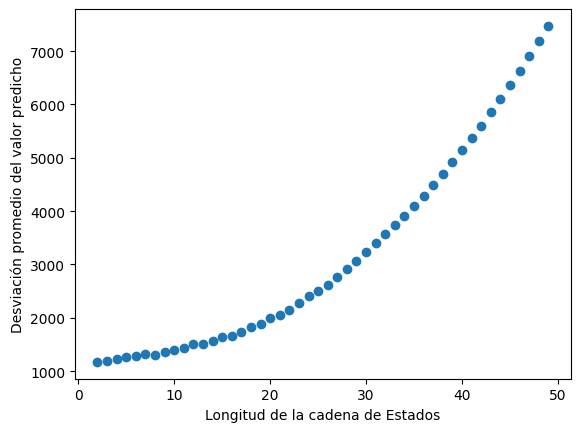

In [100]:
plt.scatter(x=x, y=y1)
plt.xlabel("Longitud de la cadena de Estados")
plt.ylabel("Desviación promedio del valor predicho")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

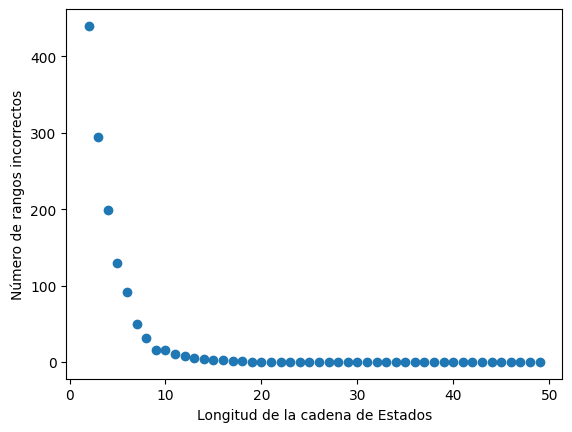

In [101]:
plt.scatter(x=x, y=y2)
plt.xlabel("Longitud de la cadena de Estados")
plt.ylabel("Número de rangos incorrectos")
plt.show